In this lecture, we study how to use Python to work with CSV and JSON files. CSV and JSON files are just plaintext files in nature. You can view them in a text editor, such as IDLE’s file editor. But Python also comes with the special 'csv' and 'json' modules, each providing functions to help you work with these file formats.

CSV stands for “comma-separated values,” and CSV files are simplified spreadsheets stored as plaintext files. JSON is a format that stores information as JavaScript source code in plaintext files. You don’t need to know the JavaScript programming language to use JSON files, but the JSON format is useful to know because it’s used in many web applications. We will go over the basics of JSON files in detail later. 

We first discuss CSV files, in which each line in a CSV file represents a row in the spreadsheet, and commas separate the cells in the row. CSV files are simple, lacking many of the features of an Excel spreadsheet. For example, CSV files don’t have types for their values—everything is a string. They don’t have settings for font size or color. They don’t have multiple worksheets, nor cell widths, heights, or any concepts of merged cells. Last but not least, they won't allow images or charts to be embedded in them. 

Since CSV files are just plain text files, you might be tempted to read them in as text strings. This is ok but not recommended, because CSV files may not all be comma-delimited. We strongly encourage programmers to use the 'csv' module to handle CSV files. 

To read data from a CSV file with the 'csv' module, you need to create a 'Reader' object. A 'Reader' object lets you iterate over lines in the CSV file. Instead of calling the read() or readlines() method on the 'File' object that the method open() returns, we can pass it to the csv.reader() function. This will return a 'Reader' object for you to use. Note that you don’t pass a filename string directly to the csv.reader() function. The most direct way to access the values in the 'Reader' object is to convert it to a plain Python list by passing it to list():

In [2]:
import csv
import os
os.chdir("C:\\Users\\GAO\\Anaconda\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\Datasets and Files")

In [2]:
exampleFile = open('example.csv')
exampleReader = csv.reader(exampleFile)
exampleData = list(exampleReader)
print(exampleData)

[['4/5/2014 13:34', 'Apples', '73'], ['4/5/2014 3:41', 'Cherries', '85'], ['4/6/2014 12:46', 'Pears', '14'], ['4/8/2014 8:59', 'Oranges', '52'], ['4/10/2014 2:07', 'Apples', '152'], ['4/10/2014 18:10', 'Bananas', '23'], ['4/10/2014 2:40', 'Strawberries', '98']]


Now that you have the CSV file as a list of lists, you can access the value at a particular row and column with the expression 

    list_object_csv[row_index][col_index]

Here 'row_index' is the index of one of the lists in the list object, and 'col_index' is the index of the item you want from that list. Below we iteratively print out the elements of the CSV file for each row and column in two ways:

In [3]:
for i in range(len(exampleData)):
    for j in range(len(exampleData[i])):
        print(exampleData[i][j])
print('\n')
for t in range(len(exampleData)):
        print(exampleData[t])

4/5/2014 13:34
Apples
73
4/5/2014 3:41
Cherries
85
4/6/2014 12:46
Pears
14
4/8/2014 8:59
Oranges
52
4/10/2014 2:07
Apples
152
4/10/2014 18:10
Bananas
23
4/10/2014 2:40
Strawberries
98


['4/5/2014 13:34', 'Apples', '73']
['4/5/2014 3:41', 'Cherries', '85']
['4/6/2014 12:46', 'Pears', '14']
['4/8/2014 8:59', 'Oranges', '52']
['4/10/2014 2:07', 'Apples', '152']
['4/10/2014 18:10', 'Bananas', '23']
['4/10/2014 2:40', 'Strawberries', '98']


Using lists brings up a good point. For large CSV files, you’ll want to use the 'Reader' object in a for loop. This avoids loading the entire file into memory at once. To get the row number, use the 'Reader' object’s line_num variable, which contains the number of the current line. Keep in mind that the 'Reader' object can be looped over only once. To reread the CSV file, you must call csv.reader to create a 'Reader' object.

Let's read the data in a more compact way this time:

In [4]:
exampleFile = open('example.csv')
exampleReader = csv.reader(exampleFile)
for row in exampleReader:
    print('Row ' + str(exampleReader.line_num) + ': ' + str(row))

Row 1: ['4/5/2014 13:34', 'Apples', '73']
Row 2: ['4/5/2014 3:41', 'Cherries', '85']
Row 3: ['4/6/2014 12:46', 'Pears', '14']
Row 4: ['4/8/2014 8:59', 'Oranges', '52']
Row 5: ['4/10/2014 2:07', 'Apples', '152']
Row 6: ['4/10/2014 18:10', 'Bananas', '23']
Row 7: ['4/10/2014 2:40', 'Strawberries', '98']


In a similar fashion, a 'Writer' object lets you write data to a CSV file. To create a 'Writer' object, you use the csv.writer() function. 

Below is another example of writing out a CSV file by manual entry. First, we call open() and pass it 'w' to open a file in write mode. This will create the object you can then pass to csv.writer() to create a 'Writer' object. On Windows, you’ll also need to pass a blank string for the open() function’s 'newline' keyword argument. For technical reasons beyond the scope of this lecture, if you forget to set the newline argument, the rows in output.csv will be double-spaced. The writerow() method for 'Writer' objects takes a list argument. Each value in the list is placed in its own cell in the output CSV file. The return value of writerow() is the number of characters written to the file for that row (including 'newline' characters).

In [5]:
outputFile = open('output_ch14_1.csv', 'w', newline='')
outputWriter = csv.writer(outputFile)
outputWriter.writerow(['spam', 'eggs', 'bacon', 'ham'])
outputWriter.writerow(['Hello, world!', 'eggs', 'bacon', 'ham'])
outputWriter.writerow([1, 2, 3.141592, 4])
outputFile.close()

Notice how the 'Writer' object automatically escapes the comma in the value 'Hello, world!' with double quotes in the CSV file. The 'csv' module saves you from having to handle these special cases yourself.

Now for another example, say you want to separate cells with a tab character instead of a comma and you want the rows to be double-spaced. You could enter something like the following:

In [6]:
csvFile = open('output_ch14_2.csv', 'w', newline='')
csvWriter = csv.writer(csvFile, delimiter='\t', lineterminator='\n\n')
csvWriter.writerow(['apples', 'oranges', 'grapes'])
csvWriter.writerow(['eggs', 'bacon', 'ham'])
csvWriter.writerow(['spam', 'spam', 'spam', 'spam', 'spam', 'spam'])
csvFile.close()

Now this program above changes the delimiter and line terminator characters in your file. The delimiter is the character that appears between cells on a row. By default, the delimiter for a CSV file is a comma. The 'lineterminator' is the character that comes at the end of a row. By default, the 'lineterminator' is a 'newline'. You can change characters to different values by using the delimiter and 'lineterminator' keyword arguments with the csv.writer() function.

Passing delimeter='\t' and lineterminator='\n\n' changes the character between cells to a tab and the character between rows to two 'newlines'. 

Next we will talk about JSON files. 'JavaScript Object Notation' is a popular way to format data as a single human-readable string. JSON is the native way that JavaScript programs write their data structures and usually resembles what Python’s pprint() function would produce. You don’t need to know JavaScript in order to work with JSON-formatted data.

Here’s an example of data formatted as JSON:

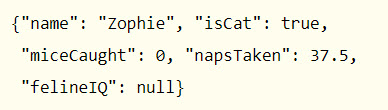

In [7]:
from IPython.display import Image
Image("ch14_snapshot_1.jpg") 

JSON is useful to know, because many websites offer JSON content as a way for programs to interact with the website. This is known as providing an application programming interface (API). Accessing an API is the same as accessing any other web page via a URL. The difference is that the data returned by an API is formatted (with JSON, for example) for machines; APIs aren’t easy for people to read.

Many websites make their data available in JSON format. Facebook, Twitter, Yahoo, Google, Tumblr, Wikipedia, Flickr, Data.gov, Reddit, IMDb, Rotten Tomatoes, LinkedIn, and many other popular sites offer APIs for programs to use. Some of these sites require registration, which is almost always free. You’ll have to find documentation for what URLs your program needs to request in order to get the data you want, as well as the general format of the JSON data structures that are returned. This documentation should be provided by whatever site is offering the API; if they have a “Developers” page, look for the documentation there.

For example, using APIs, you could write programs that do the following:
   1. Scrape raw data from websites (accessing APIs is often more convenient than downloading web pages and parsing HTML with web scraping modules)
   2. Automatically download new posts from one of your social network accounts and post them to another account. For example, you could take your Tumblr posts and post them to Facebook.
   3. Create a "movie encyclopedia" for your personal movie collection by pulling data from IMDb, Rotten Tomatoes, and Wikipedia and putting it into a single text file on your computer.
   
There are many other applications of JSON of course. We won't list all of them here. 

In [8]:
import json

Python’s 'json' module handles all the details of translating between a string with JSON data and Python values for the json.loads() and json.dumps() functions. JSON can’t store every kind of Python value. It can contain values of only the following data types: strings, integers, floats, Booleans, lists, dictionaries, and NoneType. JSON cannot represent Python-specific objects, such as File objects, CSV Reader or Writer objects, Regex objects etc.

To translate a string containing JSON data into a Python value, pass it to the json.loads() function. The result is usually a dictionary (the name means 'load string' not 'loads'). Here is an example:

In [9]:
stringOfJsonData = '{"name": "Zophie", "isCat": true, "miceCaught": 0, "felineIQ": null}'
jsonDataAsPythonValue = json.loads(stringOfJsonData)
print(jsonDataAsPythonValue)
print(type(jsonDataAsPythonValue)) # this is a dictionary

{'name': 'Zophie', 'isCat': True, 'miceCaught': 0, 'felineIQ': None}
<class 'dict'>


Note that JSON strings always use double quotes. It will return that data as a Python dictionary. Python dictionaries are not ordered, so the key-value pairs may appear in a different order.

The json.dumps() function (which means "dump string", not "dumps") will translate a Python value into a string of JSON-formatted data:

In [10]:
pythonValue = {'isCat': True, 'miceCaught': 0, 'name': 'Zophie', 'felineIQ': None}
stringOfJsonData = json.dumps(pythonValue)
print(stringOfJsonData)
print(type(stringOfJsonData)) # this is a string

{"isCat": true, "miceCaught": 0, "name": "Zophie", "felineIQ": null}
<class 'str'>
